In [ ]:
library(survival)
library(dplyr)
net=read.csv("/content/internet_service_churn.csv")


In [ ]:
net[is.na(net)] <- 0

In [ ]:
head(net)

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
,<int>,<int>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<int>,<int>
1,15,1,0,11.95,25,0.14,0,8.4,2.3,0,0
2,18,0,0,8.22,0,0.00,0,0.0,0.0,0,1
3,23,1,0,8.91,16,0.00,0,13.7,0.9,0,1
4,27,0,0,6.87,21,0.00,1,0.0,0.0,0,1
5,34,0,0,6.39,0,0.00,0,0.0,0.0,0,1
6,56,1,1,11.94,32,1.38,0,69.4,4.0,0,0


In [ ]:
df=with(net,Surv(id,churn))


In [ ]:
survfit(Surv(id,churn) ~ 1,data = net)

Call: survfit(formula = Surv(id, churn) ~ 1, data = net)

         n events  median 0.95LCL 0.95UCL
[1,] 72274  40050 1097176 1087399 1108192

In [ ]:
survfit(Surv(id, churn)~1, data=net)

Call: survfit(formula = Surv(id, churn) ~ 1, data = net)

         n events  median 0.95LCL 0.95UCL
[1,] 72274  40050 1097176 1087399 1108192

In [ ]:
vida=coxph(Surv(id,churn)~is_tv_subscriber+is_movie_package_subscriber+
      subscription_age+bill_avg+reamining_contract+service_failure_count+
      download_avg+upload_avg+download_over_limit,data = net)

In [ ]:
summary(vida)

Call:
coxph(formula = Surv(id, churn) ~ is_tv_subscriber + is_movie_package_subscriber + 
    subscription_age + bill_avg + reamining_contract + service_failure_count + 
    download_avg + upload_avg + download_over_limit, data = net)

  n= 72274, number of events= 40050 

                                  coef  exp(coef)   se(coef)        z Pr(>|z|)
is_tv_subscriber            -0.7100964  0.4915968  0.0122009  -58.200  < 2e-16
is_movie_package_subscriber -0.1060025  0.8994224  0.0133219   -7.957 1.76e-15
subscription_age             0.3881376  1.4742327  0.0033911  114.459  < 2e-16
bill_avg                     0.0007328  1.0007331  0.0004315    1.698   0.0894
reamining_contract          -2.4386101  0.0872821  0.0198546 -122.823  < 2e-16
service_failure_count        0.1061794  1.1120213  0.0055215   19.230  < 2e-16
download_avg                -0.0140684  0.9860301  0.0002025  -69.480  < 2e-16
upload_avg                   0.0005960  1.0005962  0.0008195    0.727   0.4671
download_over_l

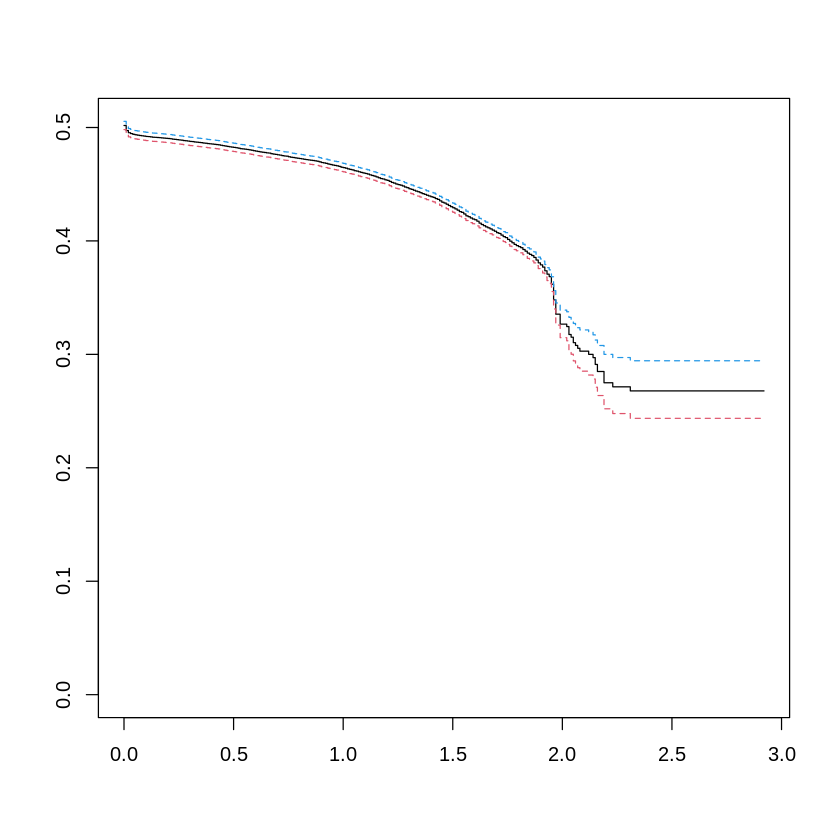

In [ ]:
plot(survfit(Surv(reamining_contract, churn)~1, data=net),col=c(1,2,4))

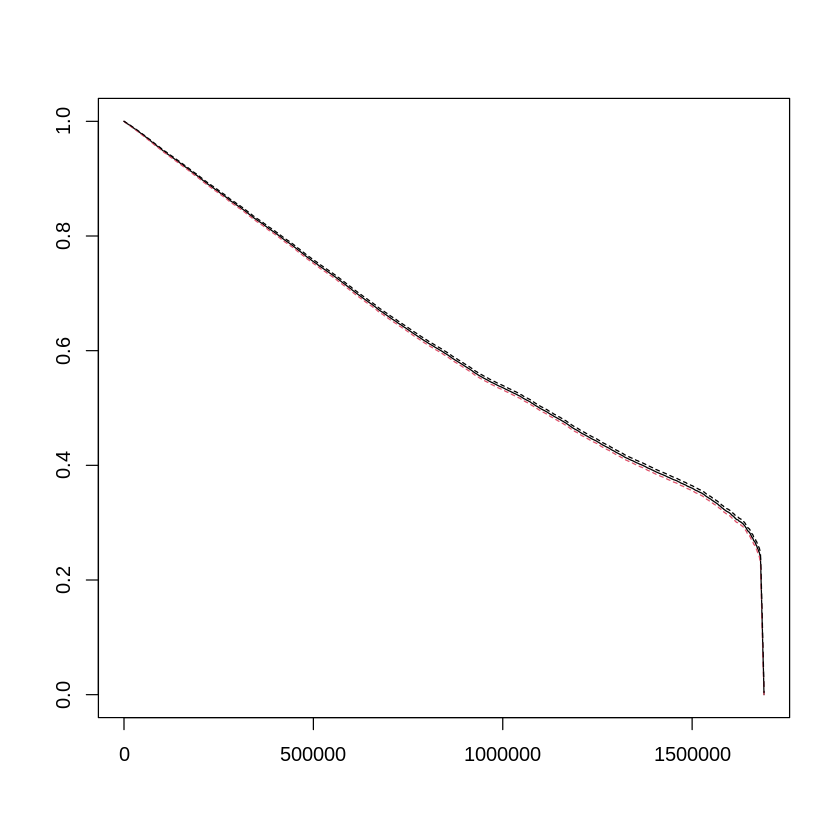

In [ ]:
plot(survfit(Surv(id, churn)~1, data=net),col=c(1,2))

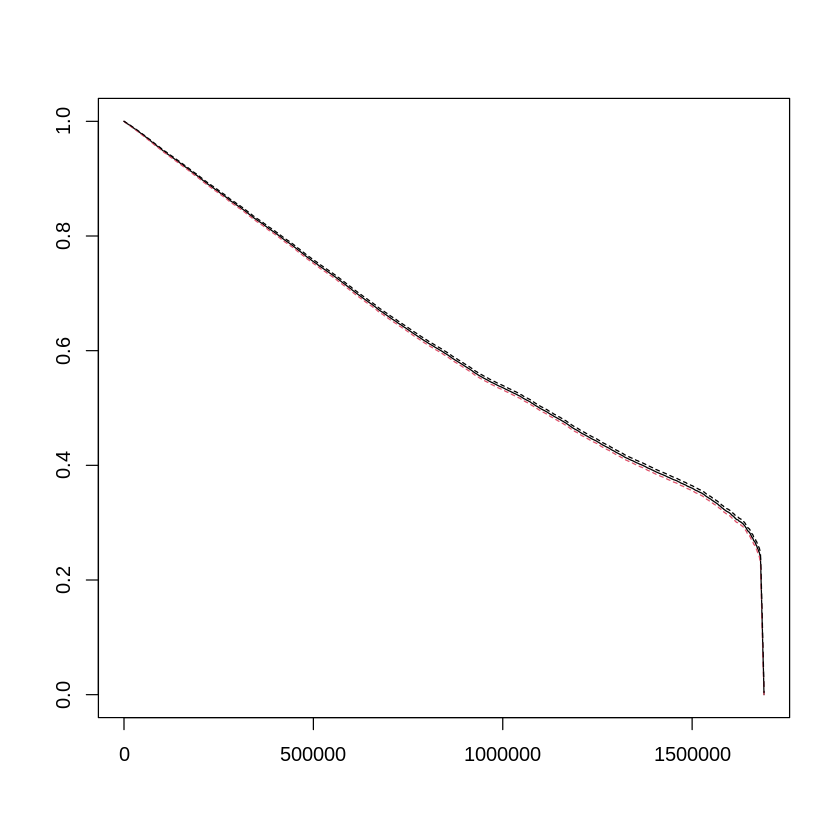

In [ ]:
plot(df,col=c(1,2))